In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
# importing the datasets or files
df_booking = pd.read_csv('Datasets/fact_bookings.csv')
df_hotels = pd.read_csv('Datasets/dim_hotels.csv')
df_rooms = pd.read_csv('Datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('Datasets/fact_aggregated_bookings.csv')
df_aug_data = pd.read_csv('Datasets/new_data_august.csv')

df_booking.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [3]:
df_booking.shape

(134590, 12)

In [4]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
# count of bookings per plateform 
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

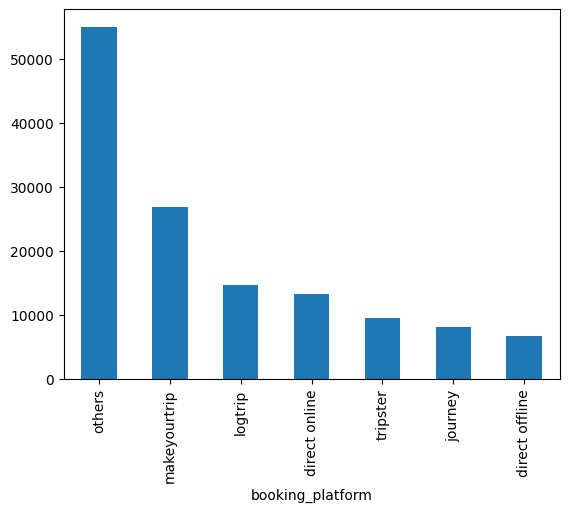

In [7]:
# ploting a cahrt 
df_booking.booking_platform.value_counts().plot(kind= 'bar')

<Axes: ylabel='booking_platform'>

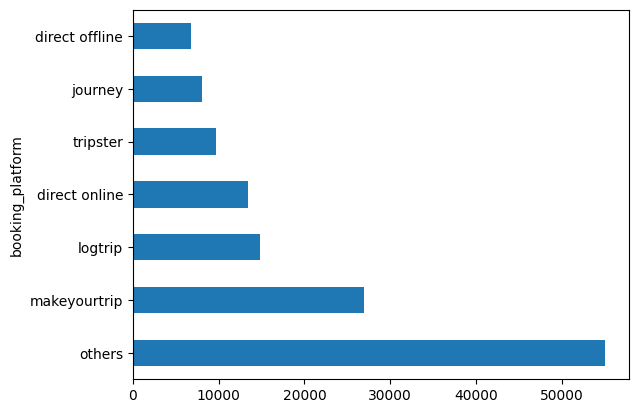

In [8]:
# ploting bar chart hozitontally
df_booking.booking_platform.value_counts().plot(kind= 'barh')

In [9]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
df_booking.revenue_generated.min(), df_booking.revenue_generated.max()

(6500, 28560000)

In [11]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [12]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [13]:
df_hotels.city.value_counts().sort_values() # 

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

<Axes: xlabel='city'>

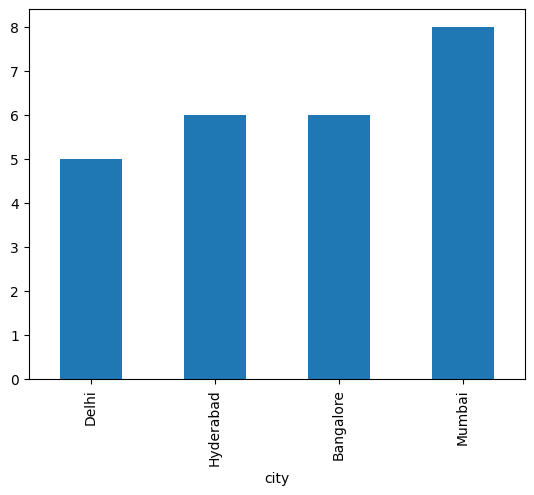

In [14]:
# plot a bar chart for that
df_hotels.city.value_counts().sort_values().plot(kind = 'bar')

# Data Cleaning

In [15]:
df_booking.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [16]:
# checking the data
df_booking[df_booking.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [17]:
df_booking.shape

(134590, 12)

In [18]:
df_booking = df_booking[df_booking.no_guests>0]
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [19]:
df_booking.shape

(134578, 12)

Now -ve values are removed from the dataset

In [20]:
# checking for the revenue_generated column
df_booking.revenue_generated.min(), df_booking.revenue_generated.max()

(6500, 28560000)

In [21]:
# applying Std in revenue_generated column
avg, std = df_booking.revenue_generated.mean(),df_booking.revenue_generated.std()

In [22]:
avg, std

(15378.036937686695, 93040.1549314641)

In [23]:
higer_limit = avg + 3*std
higer_limit

294498.50173207896

In [24]:
lower_limit = avg - 3*std
lower_limit

-263742.4278567056

In [25]:
# my revenue generated should not be negative
df_booking[df_booking.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


- there is no such any -ve revenue generated in our dataset

In [26]:
# outlier in revenue generated column
df_booking[df_booking.revenue_generated>higer_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


- these are the outlier for the revenue_generated column. and he can remove them using reverse condition

In [27]:
df_booking = df_booking[df_booking.revenue_generated< higer_limit]

In [28]:
df_booking.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [29]:
df_booking.shape

(134573, 12)

In [30]:
# checking the revenue_realized column
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [31]:
higher_limit = df_booking.revenue_realized.mean() + 3* df_booking.revenue_realized.std()
higher_limit

33479.358661845814

In [32]:
df_booking[df_booking.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [33]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


- here RT4 reknown as presidential room class and these types of rooms are really expensive as compared to any other in our dataset so we as per this reason i can say that these 1299 raws are not an outler it's high pawing room type in hotels.

- for this problem we get std only for the entire RT4 rooms and apply them.

In [34]:
df_booking[df_booking.room_category == "RT4"]  # these all are the rt4 rooms

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
47,May012216558RT41,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT4,logtrip,NaN,Cancelled,26600,10640
48,May012216558RT42,16558,27-04-22,1/5/2022,2/5/2022,1.0,RT4,tripster,NaN,Checked Out,26600,26600
49,May012216558RT43,16558,29-04-22,1/5/2022,4/5/2022,2.0,RT4,direct offline,NaN,Cancelled,26600,10640
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
138,May012216559RT42,16559,11/4/2022,1/5/2022,3/5/2022,2.0,RT4,direct offline,NaN,Cancelled,32300,12920
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [35]:
df_booking[df_booking.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

- for this std for only rt4 rooms first we need to check your higher limit for the rt4 rooms. 

In [36]:
higher_limit = 23439 + 3*9048
higher_limit

50583

- as we can see that our higher_limit for the rt4 rooms are 50583, but in our dataset rt4 having highest revenue 45220 max, means here is no any outlier, thats comform.

# Isna Values

In [37]:
df_booking.isnull().sum()


booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

# Data Transformation

In [38]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [39]:
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [40]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x : round(x*100,2))
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89


# Some Ad-Hoc requests from the manager:

- **=> 1.What is the avg occupancy rate in each of the room categories?**

In [41]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [42]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [43]:
# We are merging the df_rooms and df_agg_bookings to getting more insights

In [44]:
df = pd.merge(df_agg_bookings, df_rooms, left_on= 'room_category', right_on='room_id')
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [45]:
# Now checking the avg occupancy rate in each of the room categories 
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [46]:
df.drop('room_id', axis= 1, inplace = True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


# 2. Print the Average Occupancy rate per City

In [47]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [48]:
# merging the df and df_hotel tables
df = pd.merge(df, df_hotels, on = 'property_id' )
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [49]:
# now printing the avg occ rate per city
df.groupby('city')['occ_pct'].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

<Axes: ylabel='city'>

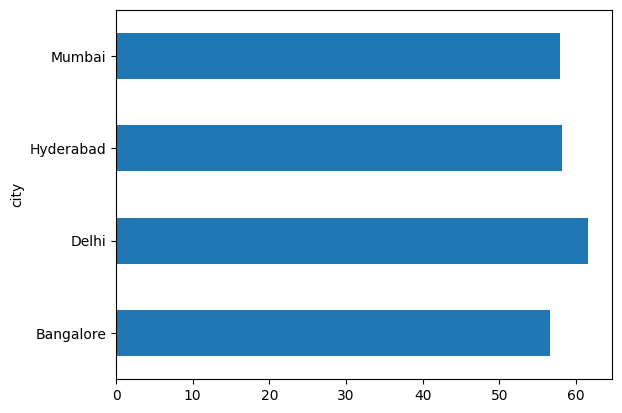

In [50]:
# ploting city wise avg occ rate in bar chart
df.groupby('city')['occ_pct'].mean().round(2).plot(kind= 'barh')

# 3. When Was the Occ Better? Weekday Or Weekend?

In [51]:
df_date = pd.read_csv('Datasets/dim_date.csv')
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [52]:
# merging the df-date with df table
df = pd.merge(df, df_date, left_on = 'check_in_date', right_on = 'date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [53]:
# getting thaat When Was the Occ Better
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

# 4. In the month of June, what is the occupancy for different cities

In [54]:
df['mmm yy'].unique() 

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [55]:
df_jun_22 = df[df['mmm yy']== 'Jun 22']
df_jun_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [56]:
# getting In the month of June, what is the occupancy for different cities
df_jun_22.groupby('city')['occ_pct'].mean().round(2)

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

In [57]:
df_aug_data.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [58]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [59]:
df_aug_data.shape

(7, 13)

In [60]:
df.shape

(6500, 14)

In [61]:
latest_df = pd.concat([df, df_aug_data], ignore_index= True, axis = 0 )
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6497,18560,31-Jul-22,RT2,34,40.0,85.00,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,18560,31-Jul-22,RT3,17,24.0,70.83,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,18560,31-Jul-22,RT4,12,15.0,80.00,Presidential,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


# 6. Print revenue realized per City

In [62]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [63]:
df_booking.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [64]:
df_booking_all = pd.merge(df_booking, df_hotels, on = 'property_id')
df_booking_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [65]:
# revenue realized per City
df_booking_all.groupby('city')['revenue_realized'].sum()


city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

# 7. Print month by month revenue

In [66]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [67]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [68]:
# merging the df_booking_all with df-date
pd.merge(df_booking_all, df_date, left_on ='check_in_date', right_on='date')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [69]:
df_booking_all.info(), df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

(None, None)

- both columnm date are in obj now we need to change its types into datetype

In [70]:
df_date["date"] = pd.to_datetime(df_date['date'])
df_date['date'].head()

C:\Users\mrinn\AppData\Local\Temp\ipykernel_21388\930262336.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date['date'])


0   2022-05-01
1   2022-05-02
2   2022-05-03
3   2022-05-04
4   2022-05-05
Name: date, dtype: datetime64[ns]

In [71]:
df_booking_all['check_in_date'] = pd.to_datetime(df_booking_all['check_in_date'], format='%d-%m-%y', dayfirst=True, errors='coerce')
df_booking_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,NaT,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,NaT,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,NaT,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,NaT,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [72]:
# checking the info
df_booking_all.info(), df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      78783 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

(None, None)

In [73]:
# merging the df_booking_all with df-date
df_booking_all = pd.merge(df_booking_all, df_date, left_on ='check_in_date', right_on='date')
df_booking_all.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May132216558RT11,16558,10/5/2022,2022-05-13,15-05-22,2.0,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-13,May 22,W 20,weekeday
1,May132216558RT12,16558,9/5/2022,2022-05-13,14-05-22,2.0,RT1,makeyourtrip,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-13,May 22,W 20,weekeday


In [74]:
# getting the month by month revenue
df_booking_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    329662416
Jun 22    324288215
May 22    347414213
Name: revenue_realized, dtype: int64